In [16]:
import numpy as np
import math
import scipy.optimize 
from scipy.optimize import fsolve 
import matplotlib.pyplot as plt

In [2]:
#Gegebene Werte für CO2 und N2 aus Tabelle S2 mit 1=CO2 und 2=N2
n_ref=[7.268,4.051]                     #mol/kg
X=[-0.61684,0]                          #-
b_0=[1.129*10**(-4),5.8470*10**(-5)]    # 1/bar
Q_b=[28389,18474]                       #J/mol
c_ref=[0.42456,0.98624]                 #-
alpha=[0.72378,0]                       #-
T_ref=[298,298]                         #K
T_low=303.02                            #K
T_high=421.34                           #K
R=8.314                                 #J/(mol*K)
y_F=[0.12,(1-0.12)]                     #-
P=1                                     #bar
m_ads=1                                 #kg
roh_part=1085                           #kg/m**3
roh_bed=708                             #kg/m**3 
l=1.2                                   #m Länge der Kolonne
D_innen=0.03                            #m 
V_feed=3.5*10**(-4)                     #m**3/s
P_feed=1.3                              #bar
c_p_ads=920                             #J/(kg*K)
MW=[44,14]                              #g/mol

In [3]:
#Berechnung der Temperaturschritte T_k #K
def T_k_f(T_k,T_low,T_high):
    return(T_k+(T_high-T_low)/50)

T_k=[]
T_k.append(T_low)
for k in range (1,51,1):
    res=T_k_f(T_k[k-1],T_low,T_high)
    T_k.append(res)
T_k.append(500)

len(T_k)

52

In [4]:
#Berechnung von c_0_k und b_1_k    #-
def c_i_f(c_ref,alpha,T_k,T_ref):
    return (c_ref+alpha*(T_k/T_ref-1)) 
   
c_0_k=[]
c_1_k=[]
for k in range (0,51,1):
    res0=c_i_f(c_ref[0],alpha[0],T_k[k],T_ref[0])
    res1=c_i_f(c_ref[1],alpha[1],T_k[k],T_ref[1])
    c_0_k.append(res0)
    c_1_k.append(res1)

def b_i_f(b_0,Q_b,T_k,R):
    return(b_0*math.exp(Q_b/(T_k*R)))

b_0_k=[]
b_1_k=[]
for k in range(0,51,1):
    res0=b_i_f(b_0[0],Q_b[0],T_k[k],R)
    res1=b_i_f(b_0[1],Q_b[1],T_k[k],R)
    b_0_k.append(res0)
    b_1_k.append(res1)
    
#Berechnung von n_0_k und n_1_k    #mol/kg
def n_i_f(n_ref,X,T_ref,T_k):
    return(n_ref*math.exp(X*(T_k/T_ref-1)))

n_0_k=[]
n_1_k=[]
for k in range (0,51,1):
    res0=n_i_f(n_ref[0],X[0],T_ref[0],T_k[k])
    res1=n_i_f(n_ref[1],X[1],T_ref[1],T_k[k])
    n_0_k.append(res0)
    n_1_k.append(res1)
len(n_0_k)

51

In [5]:
#Berechnung der Porosität            #-
def epsilon_f(roh_part,roh_bed):
    return(1-roh_bed/roh_part)

epsilon=epsilon_f(roh_part,roh_bed)
epsilon

0.3474654377880184

In [6]:
#Berechnung von V                    #m**3
def V_f(m_ads,roh_bed):
    return(m_ads/roh_bed)

V=V_f(m_ads,roh_bed)
V

0.0014124293785310734

In [7]:
#Berechnung von N_feed                
def N_feed_f(p_feed,V_feed,R,T):
    return(10**5*p_feed*V_feed/(R*T))

N_feed=N_feed_f(P_feed,V_feed,R,T_low)
N_feed

0.018060513023042978

In [9]:
# y_k_c_t = 0.9999999919828562
# b_0_c_k = 0.3734916197525026
# c_0_c_k = 0.7241271986577181
# n_0_c_k = 5.630372640832929
# b_1_c_k = 0.011410027946939679
# c_1_c_k = 0.98624
# n_1_c_k = 4.051
# n_ads_0_f(n_0_c_k, b_0_c_k, y_k_c_t, c_0_c_k,P, b_1_c_k , c_1_c_k )

In [10]:
len(y_k)

NameError: name 'y_k' is not defined

In [11]:
len(N_out)

NameError: name 'N_out' is not defined

In [12]:
len(n_ads_0)

NameError: name 'n_ads_0' is not defined

In [13]:
# T_k

In [45]:
#Materialbilanzen Heating Step

y_k=[]
y_k.append(y_F[0])
N_out=[]
N_out.append(N_feed)
N_total_0=[]
N_total_1=[]
n_ads_0=[]
n_ads_1=[]
N_ads_0=[]
N_ads_1=[]
N_gas_0=[]
N_gas_1=[]

#Berechnung von n_ads_0 und n_ads_1               #mol/kg            
def n_ads_0_f(n_0_k,b_0_k,y_k,c_0_k,P,b_1_k,c_1_k):
    # calculates n0
    return((n_0_k*(b_0_k*P*y_k)**c_0_k)/(1+((b_0_k*P*y_k)**c_0_k)+(b_1_k*P*(1-y_k))**c_1_k))

def n_ads_1_f(n_1_k,b_1_k,y_k,c_1_k,P,b_0_k,c_0_k):
    return((n_1_k*(b_1_k*P*(1-y_k))**c_1_k)/(1+(b_1_k*P*(1-y_k))**c_1_k+(b_0_k*P*y_k)**c_0_k))

#Berechnung von N_ads_0 und N_ads_1               #mol
def N_ads_0_f(m_ads,n_ads_0):
    return(m_ads*n_ads_0)

def N_ads_1_f(m_ads,n_ads_1):
    return(m_ads*n_ads_1)

#Berechnung von N_gas_0 und N_gas_1             #mol
def N_gas_0_f(epsilon,y_k,P,V,R,T_k):
    return(epsilon*V*P*10**5*y_k/(R*T_k))

def N_gas_1_f(epsilon,y_k,P,V,R,T_k):
    return(epsilon*V*P*10**5*(1-y_k)/(R*T_k))

#Berechnungvon N_total_0 und N_total_1               #mol
def N_total_0_f(N_ads_0,N_gas_0):
    return(N_ads_0+N_gas_0)

def N_total_1_f(N_ads_1,N_gas_1):
    return(N_ads_1+N_gas_1)

In [27]:
n_ads_pureT = []
for (i, T) in enumerate(T_k[:-1]):
    # print(i)
    n_ads_pure_T_i = n_ads_0_f(n_0_k[i], b_0_k[i], 1.0, c_0_k[i], P, b_1_k[i],c_1_k[i])
    n_ads_pureT.append(n_ads_pure_T_i)

In [39]:
n_ads_pureP = []
Ps=np.linspace(0.01, 10.0, 100)
for (i, P) in enumerate(Ps):
    # print(i)
    n_ads_pureP_i = n_ads_0_f(n_0_k[0], b_0_k[0], 1.0, c_0_k[0], P, b_1_k[0],c_1_k[0])
    n_ads_pureP.append(n_ads_pureP_i)

In [38]:
n_ads_mix = []
yA=np.linspace(0.0, 1.0, 100)
for (i,y) in enumerate(yA):
    # print(i)
    n_ads_mix_i = n_ads_0_f(n_0_k[0], b_0_k[0], y, c_0_k[0], P, b_1_k[0],c_1_k[0])
    n_ads_mix.append(n_ads_mix_i)

Text(0.5, 1.0, 'n_ads vs T for P=1bar and y_a=1 -> pure CO_2')

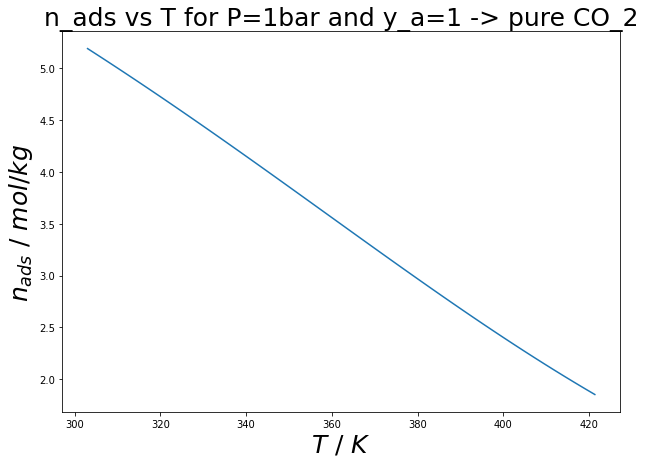

In [42]:
fontsize=25
fig=plt.figure(figsize=[10,7])
plt.plot(T_k[:-1], n_ads_pureT)
plt.ylabel(r'$n_{{ads}}$ / $mol/kg$', fontsize=fontsize)

plt.xlabel(r'$T$ / $K$', fontsize=fontsize)
plt.title(r'n_ads vs T for P=1bar and y_a=1 -> pure CO_2', fontsize=fontsize)

Text(0.5, 1.0, 'n_ads vs p for T=303K and y_a=1 -> pure CO_2')

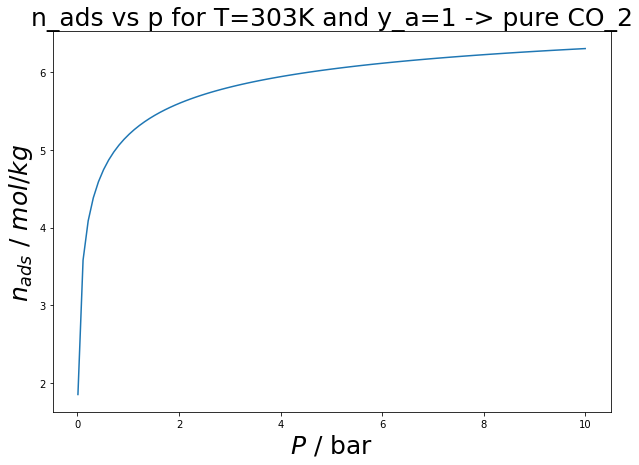

In [43]:
fontsize=25
fig=plt.figure(figsize=[10,7])
plt.plot(Ps, n_ads_pureP)
plt.ylabel(r'$n_{{ads}}$ / $mol/kg$', fontsize=fontsize)

plt.xlabel(r'$P$ / bar', fontsize=fontsize)
plt.title(r'n_ads vs p for T=303K and y_a=1 -> pure CO_2', fontsize=fontsize)

Text(0.5, 1.0, '$n_{{ads}}$ vs $y_A$ for $P=1bar$ and $T=303K$')

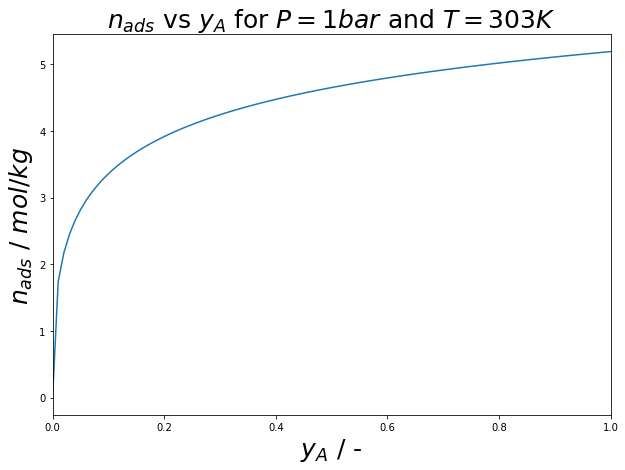

In [44]:
fontsize=25
fig=plt.figure(figsize=[10,7])
plt.plot(yA, n_ads_mix)
plt.ylabel(r'$n_{{ads}}$ / $mol/kg$', fontsize=fontsize)

plt.xlabel(r'$y_A$ / -', fontsize=fontsize)
plt.xlim([0,1])
plt.title(r'$n_{{ads}}$ vs $y_A$ for $P=1bar$ and $T=303K$', fontsize=fontsize)

In [9]:
def MB_HS(vars):
    N_out_t,y_k_t=vars
    print(f'N_out_t = {N_out_t}')
    print(f'y_k_t = {y_k_t}')
    
    n_ads_0_k=n_ads_0_f(n_0_k[k+1],b_0_k[k+1],y_k_t,c_0_k[k+1],P,b_1_k[k+1],c_1_k[k+1])
    N_ads_0_k=N_ads_0_f(m_ads,n_ads_0_k)
    N_gas_0_k=N_gas_0_f(epsilon,y_k_t,P,V,R,T_k[k+1])
    N_total_0_k=N_total_0_f(N_ads_0_k,N_gas_0_k)
    
    n_ads_1_k=n_ads_1_f(n_1_k[k+1],b_1_k[k+1],y_k_t,c_1_k[k+1],P,b_0_k[k+1],c_0_k[k+1])            
    N_ads_1_k=N_ads_1_f(m_ads,n_ads_1_k)
    N_gas_1_k=N_gas_1_f(epsilon,y_k_t,P,V,R,T_k[k+1])
    N_total_1_k=N_total_1_f(N_ads_1_k,N_gas_1_k)   
                
    
    print(f'y_k_t*N_out_t = {y_k_t*N_out_t}')
    print(f'N_total_0_k = {N_total_0_k}')
    print(f'N_total_0[k] = n_total_0 k-1 = {N_total_0[k]}')
    print(f'(1-y_k_t)*N_out_t = {(1-y_k_t)*N_out_t}')
    print(f'N_total_1_k = {N_total_1_k}')
    print(f'N_total_1[k] = n_total_1 k-1 = {N_total_1[k]}')
    
    eqn_1=N_total_0[k]-y_k_t*N_out_t-N_total_0_k 
    eqn_2=N_total_1[k]-(1-y_k_t)*N_out_t-N_total_1_k    
    print(f'eqn1 = {eqn_1}')
    print(f'eqn2 = {eqn_2}')
    return [eqn_1,eqn_2]

for k in range (0,51,1):
    print(f'k={k}')
    res0=n_ads_0_f(n_0_k[k],b_0_k[k],y_k[k],c_0_k[k],P,b_1_k[k],c_1_k[k])
    res1=n_ads_1_f(n_1_k[k],b_1_k[k],y_k[k],c_1_k[k],P,b_0_k[k],c_0_k[k])
    n_ads_0.append(res0)
    n_ads_1.append(res1)

    res0=N_ads_0_f(m_ads,n_ads_0[k])
    res1=N_ads_1_f(m_ads,n_ads_1[k])
    N_ads_0.append(res0)
    N_ads_1.append(res1)

    res0=N_gas_0_f(epsilon,y_k[k],P,V,R,T_k[k])
    res1=N_gas_1_f(epsilon,y_k[k],P,V,R,T_k[k])
    N_gas_0.append(res0)
    N_gas_1.append(res1)   

    res0=N_total_0_f(N_ads_0[k],N_gas_0[k])
    res1=N_total_1_f(N_ads_1[k],N_gas_1[k])
    N_total_0.append(res0)
    N_total_1.append(res1)  
    
    #N_out_t,y_k_t= fsolve(MB_HS, (N_out[k], y_k[k]))    ##Die zwei Solver kann man tauschen. Das macht keinen Unterschied
    
    if k != 50:
        x = scipy.optimize.root(MB_HS, (N_out[k], y_k[k]) , method='hybr')
        (N_out_t,y_k_t)=x['x']
    
        y_k.append(y_k_t)
        N_out.append(N_out_t)
    
y_k

k=0
N_out_t = 0.018060513023042978
y_k_t = 0.12
y_k_t*N_out_t = 0.002167261562765157
N_total_0_k = 3.4262203696474876
N_total_0[k] = n_total_0 k-1 = 3.504440500533874
(1-y_k_t)*N_out_t = 0.01589325146027782
N_total_1_k = 0.1682362531425971
N_total_1[k] = n_total_1 k-1 = 0.17382268569309933
eqn1 = 0.07605286932362132
eqn2 = -0.010306818909775584
N_out_t = 0.018060513023042978
y_k_t = 0.12
y_k_t*N_out_t = 0.002167261562765157
N_total_0_k = 3.4262203696474876
N_total_0[k] = n_total_0 k-1 = 3.504440500533874
(1-y_k_t)*N_out_t = 0.01589325146027782
N_total_1_k = 0.1682362531425971
N_total_1[k] = n_total_1 k-1 = 0.17382268569309933
eqn1 = 0.07605286932362132
eqn2 = -0.010306818909775584
N_out_t = 0.018060513023042978
y_k_t = 0.12
y_k_t*N_out_t = 0.002167261562765157
N_total_0_k = 3.4262203696474876
N_total_0[k] = n_total_0 k-1 = 3.504440500533874
(1-y_k_t)*N_out_t = 0.01589325146027782
N_total_1_k = 0.1682362531425971
N_total_1[k] = n_total_1 k-1 = 0.17382268569309933
eqn1 = 0.07605286932362

[0.12,
 0.13187812994171538,
 0.1447942490769174,
 0.1588171458266128,
 0.17401782382384645,
 0.19046924609284022,
 0.20824600054148262,
 0.2274238667908373,
 0.24807925814595697,
 0.2702885039469651,
 0.29412692558935355,
 0.3196676426063817,
 0.3469800210634121,
 0.376127641109091,
 0.4071656082383729,
 0.4401369545284571,
 0.4750677554368443,
 0.5119604005525435,
 0.55078416056382,
 0.5914617194334569,
 0.6338495824551746,
 0.6777090765716346,
 0.7226628983178554,
 0.7681300877806857,
 0.8132320252231817,
 0.8566724927538691,
 0.89664334422701,
 0.9309382923420306,
 0.9575890217690297,
 0.9759532622541761,
 0.9871962657957062,
 0.9934638601397169,
 0.996746659085595,
 0.9984036276797535,
 0.9992228296135318,
 0.9996232687206863,
 0.9998177937996752,
 0.9999119674643325,
 0.9999574766868273,
 0.9999794514563105,
 0.9999900613726045,
 0.9999951864966367,
 0.9999976645474449,
 0.999998864366994,
 0.9999994463554,
 0.9999997292811743,
 0.99999986717966,
 0.9999999345920879,
 0.999999967

In [17]:
#Berechnung der central difference approximation zur Enthalpie

# h_p=0.00000001 #bar  ##Es scheint wohl nicht so viel Unterschied zu machen wie genau die Differenzen gewählt werden.  
# h_T=2.3664 #K        ##h_p darf nicht größer als 0.00000001 gewählt werden, weil es sonst Probleme gibt
h_p=0.0000000001 #bar
h_T=0.5 #K
n_0_P_1,n_0_P_0,n_1_P_1,n_1_P_0,n_1_T,n_0_T=[],[],[],[],[],[]

def n_ads_i_f(n_i_k,b_i_k,c_i_k,P_i,P_j,b_j_k,c_j_k):
    return((n_i_k*(b_i_k*P_i)**c_i_k)/(1+((b_i_k*P_i)**c_i_k)+(b_j_k*P_j)**c_j_k))

def n_0_P_0_f(h_p):
    n_ads_0_p=n_ads_i_f(n_0_k[k],b_0_k[k],c_0_k[k],P*y_k[k]+h_p,P*(1-y_k[k]),b_1_k[k],c_1_k[k])
    n_ads_0_m=n_ads_i_f(n_0_k[k],b_0_k[k],c_0_k[k],P*y_k[k]-h_p,P*(1-y_k[k]),b_1_k[k],c_1_k[k])
    n_0_P_0=(n_ads_0_p-n_ads_0_m)/(2*h_p)
    return n_0_P_0

def n_0_P_1_f(h_p):
    n_ads_0_p=n_ads_i_f(n_0_k[k],b_0_k[k],c_0_k[k],P*y_k[k],P*(1-y_k[k])+h_p,b_1_k[k],c_1_k[k])
    n_ads_0_m=n_ads_i_f(n_0_k[k],b_0_k[k],c_0_k[k],P*y_k[k],P*(1-y_k[k])-h_p,b_1_k[k],c_1_k[k])
    n_0_P_1=(n_ads_0_p-n_ads_0_m)/(2*h_p)
    return n_0_P_1

def n_1_P_0_f(h_p):
    n_ads_1_p=n_ads_i_f(n_1_k[k],b_1_k[k],c_1_k[k],P*(1-y_k[k]),P*y_k[k]+h_p,b_0_k[k],c_0_k[k])
    n_ads_1_m=n_ads_i_f(n_1_k[k],b_1_k[k],c_1_k[k],P*(1-y_k[k]),P*y_k[k]-h_p,b_0_k[k],c_0_k[k])
    n_1_P_0=(n_ads_1_p-n_ads_1_m)/(2*h_p)
    return n_1_P_0

def n_1_P_1_f(h_p):
    n_ads_1_p=n_ads_i_f(n_1_k[k],b_1_k[k],c_1_k[k],P*(1-y_k[k])+h_p,P*y_k[k],b_0_k[k],c_0_k[k])
    n_ads_1_m=n_ads_i_f(n_1_k[k],b_1_k[k],c_1_k[k],P*(1-y_k[k])-h_p,P*y_k[k],b_0_k[k],c_0_k[k])
    n_1_P_1=(n_ads_1_p-n_ads_1_m)/(2*h_p)
    return n_1_P_1

def n_i_T_f(h_T):                                        ##T_k is in c_0_k, c_1_k, b_0_k, b_1_k, n_1_k und n_0_k enthalten. 
    b_0_p=b_i_f(b_0[0],Q_b[0],T_k[k]+h_T,R)              ##Deshalb werden die Werte neu berechnet. Jeweils mit +h_T und -h_T
    b_0_m=b_i_f(b_0[0],Q_b[0],T_k[k]-h_T,R)
    b_1_p=b_i_f(b_0[1],Q_b[1],T_k[k]+h_T,R)
    b_1_m=b_i_f(b_0[1],Q_b[1],T_k[k]-h_T,R)
    
    c_0_p=c_i_f(c_ref[0],alpha[0],T_k[k]+h_T,T_ref[0])
    c_0_m=c_i_f(c_ref[0],alpha[0],T_k[k]-h_T,T_ref[0])
    c_1_p=c_i_f(c_ref[1],alpha[1],T_k[k]+h_T,T_ref[1])
    c_1_m=c_i_f(c_ref[1],alpha[1],T_k[k]-h_T,T_ref[1])
    
    n_0_p=n_i_f(n_ref[0],X[0],T_ref[0],T_k[k]+h_T)
    n_0_m=n_i_f(n_ref[0],X[0],T_ref[0],T_k[k]-h_T)
    n_1_p=n_i_f(n_ref[1],X[1],T_ref[1],T_k[k]+h_T)
    n_1_m=n_i_f(n_ref[1],X[1],T_ref[1],T_k[k]-h_T)
    
    n_ads_0_p=n_ads_0_f(n_0_p,b_0_p,y_k[k],c_0_p,P,b_1_p,c_1_p)
    n_ads_0_m=n_ads_0_f(n_0_m,b_0_m,y_k[k],c_0_m,P,b_1_m,c_1_m)
    n_ads_1_p=n_ads_1_f(n_1_p,b_1_p,y_k[k],c_1_p,P,b_0_p,c_0_p)
    n_ads_1_m=n_ads_1_f(n_1_m,b_1_m,y_k[k],c_1_m,P,b_0_m,c_0_m)
    
    n_0_T=(n_ads_0_p-n_ads_0_m)/(2*h_T)
    n_1_T=(n_ads_1_p-n_ads_1_m)/(2*h_T)
    return n_0_T, n_1_T
      
    
for k in range (0,51,1):

    res=n_0_P_1_f(h_p)
    n_0_P_1.append(res)

    res=n_0_P_0_f(h_p)
    n_0_P_0.append(res)

    res=n_1_P_1_f(h_p)
    n_1_P_1.append(res)

    res=n_1_P_0_f(h_p)
    n_1_P_0.append(res)

    res0,res1=n_i_T_f(h_T)
    n_0_T.append(res0)
    n_1_T.append(res1)
  


In [18]:
n_0_T

[-0.032943336649352783,
 -0.03296364481866698,
 -0.0329620348133961,
 -0.032940554804353095,
 -0.03290107451767588,
 -0.03284530202557878,
 -0.03277479926930571,
 -0.03269099643252682,
 -0.03259520529249205,
 -0.032488631687364045,
 -0.03237238725252389,
 -0.03224750059884629,
 -0.03211492813562078,
 -0.03197556478638397,
 -0.03183025491361935,
 -0.031679803869013146,
 -0.03152499074378978,
 -0.0313665831311174,
 -0.031205355076392216,
 -0.03104210994013279,
 -0.030877710696758598,
 -0.030713121239314134,
 -0.03054946320755958,
 -0.030388092025186886,
 -0.030230687067707596,
 -0.030079315148098917,
 -0.029936319567707148,
 -0.029803680805776445,
 -0.029681491250653114,
 -0.029566296518192647,
 -0.029451518694904255,
 -0.029330195983468865,
 -0.029197201938810924,
 -0.02904956006926307,
 -0.028885796907016204,
 -0.0287052818821647,
 -0.0285078159396428,
 -0.028293420826985827,
 -0.028062241542956112,
 -0.027814503822304104,
 -0.027550496252773726,
 -0.027270562713094026,
 -0.02697509879

In [19]:
#Berechnung der Enthalpie

Delta_H_0,Delta_H_1=[],[]

def Delta_H_0_f(R,T_k,P,y_k,n_0_P_1,n_1_T,n_0_T,n_1_P_1,n_0_P_0,n_1_P_0):
    return(R*T_k**2/(P*y_k)*(n_0_P_1*n_1_T-n_0_T*n_1_P_1)/(n_0_P_0*n_1_P_1-n_0_P_1*n_1_P_0))

def Delta_H_1_f(R,T_k,P,y_k,n_1_P_0,n_0_T,n_1_T,n_0_P_0,n_1_P_1,n_0_P_1):
    return(R*T_k**2/(P*(1-y_k))*(n_1_P_0*n_0_T-n_1_T*n_0_P_0)/(n_1_P_1*n_0_P_0-n_1_P_0*n_0_P_1))

for k in range(0,49,1):
    
    res0=Delta_H_0_f(R,T_k[k+1],P,y_k[k+1],n_0_P_1[k],n_1_T[k],n_0_T[k],n_1_P_1[k],n_0_P_0[k],n_1_P_1[k])
    res1=Delta_H_1_f(R,T_k[k+1],P,y_k[k+1],n_1_P_0[k],n_0_T[k],n_1_T[k],n_0_P_0[k],n_1_P_1[k],n_0_P_1[k])
    Delta_H_0.append(res0)
    Delta_H_1.append(res1)
    
Delta_H_0

[30812.86819120208,
 30891.52088741407,
 30967.03837722162,
 31039.727881464678,
 31109.924257473587,
 31178.05191823411,
 31244.328719104305,
 31309.147830769438,
 31372.81620627773,
 31435.706779775177,
 31498.190493298083,
 31560.605841736407,
 31623.5558226534,
 31687.408150081334,
 31752.90046777006,
 31820.69874096717,
 31891.72583511662,
 31967.275535881126,
 32048.743219768854,
 32138.515983899564,
 32239.333753343602,
 32355.51943088129,
 32493.311857148954,
 32661.645302195266,
 32872.94204983949,
 33142.901195396094,
 33484.06699781004,
 33889.26749741604,
 34319.75317783076,
 34720.219672393316,
 35059.78198907636,
 35341.5689125657,
 35583.58731519741,
 35802.102300868726,
 36008.15107207427,
 36207.8702333984,
 36404.541533677904,
 36599.94891455116,
 36794.682988255576,
 36989.45210612701,
 37184.313380410335,
 37379.5295157581,
 37575.17406563716,
 37771.264870584586,
 37967.92043378762,
 38165.093200392694,
 38362.911893941055,
 38561.32698032153,
 38760.37036339455]

In [20]:
#Berechnung der Energiebilanz des Heating Steps

Delta_N_ads_0, Delta_N_ads_1, Q_ext=[],[],[]

def Delta_T_f(T_k,T_k_b):
    return(T_k-T_k_b)

def Delta_N_ads_0_f(N_ads_0,N_ads_0_b):
    return(N_ads_0-N_ads_0_b)

def Delta_N_ads_1_f(N_ads_1,N_ads_1_b):
    return(N_ads_1-N_ads_1_b)

def Q_ext_f(m_ads,c_p_ads,Delta_T,Delta_H_0,Delta_H_1,Delta_N_ads_0,Delta_N_ads_1):
    return(m_ads*c_p_ads*Delta_T-Delta_H_0*Delta_N_ads_0-Delta_H_1*Delta_N_ads_1)

k=0
Delta_T=Delta_T_f(T_k[k+1],T_k[k])

    
    
for k in range (0,49,1):
  
    res0=Delta_N_ads_0_f(N_ads_0[k+1],N_ads_0[k])
    res1=Delta_N_ads_1_f(N_ads_1[k+1],N_ads_1[k])
    Delta_N_ads_0.append(res0)
    Delta_N_ads_1.append(res1)

    res=Q_ext_f(m_ads,c_p_ads,Delta_T,Delta_H_0[k],Delta_H_1[k],res0,res1)
    Q_ext.append(res)
    
Q_ext


[2448.870451522648,
 2440.979804059541,
 2434.204393053843,
 2428.5275677115415,
 2423.94112131415,
 2420.4511794214395,
 2418.074438195089,
 2416.8466021205595,
 2416.821341794612,
 2418.0758849130625,
 2420.7173405611893,
 2424.8893383353698,
 2430.783430870339,
 2438.653338879781,
 2448.8373562943634,
 2461.7866902742107,
 2478.112103821763,
 2498.6497796458484,
 2524.560520193892,
 2557.4903275537085,
 2599.8066391788393,
 2654.9839177716945,
 2728.173289361092,
 2826.9777077642534,
 2962.1325433134452,
 3146.71407794398,
 3390.0645350719533,
 3682.517446700676,
 3982.394978537516,
 4234.549505808028,
 4410.257463945536,
 4516.380513713467,
 4574.536506341656,
 4604.023637430097,
 4617.392867719833,
 4621.701844800323,
 4620.657643828284,
 4616.145125156793,
 4609.081905599076,
 4599.949711007263,
 4588.969810977529,
 4576.2727809726275,
 4561.928382138221,
 4545.981805247801,
 4528.476803825962,
 4509.445349916306,
 4488.931943014685,
 4466.9731533679915,
 4443.614120914569]

In [21]:
Delta_T

2.3663999999999987

In [22]:
#Purity Specific energy and Working capacity

Sum_N_PP=0
Sum_Z_PP=0
Sum_Q=0
for k in range (0,51,1):                             ##Zähler und Nenner der Formel von product purity werden berechnet
    Sum_Z_PP=Sum_Z_PP+y_k[k]*N_out[k]
    Sum_N_PP=Sum_N_PP+N_out[k]
    
for k in range (0,49,1):                           ##Summe der Wärmen für specific energy
    Sum_Q=Sum_Q+Q_ext[k]

    
def PP_f(Sum_Z,Sum_N):                            ##Berechnung von product purity
    return(Sum_Z/Sum_N)

PP=PP_f(Sum_Z_PP,Sum_N_PP)                    #-
  
    
def Sp_E_f(Sum_Q,MW,Sum_Z):                    ##Berechnung von specific energy
    return(Sum_Q/(MW/1000*Sum_Z))

Sp_E=Sp_E_f(Sum_Q,MW[0],Sum_Z_PP)             #J/kg? Einheit von Delta H? Müsste nach Paper 2.43 MJ/kg sein


def WC_f(Sum_Z,m_ads):                         ##Berechnung der  working capacity
    return(Sum_Z/m_ads)

WC=WC_f(Sum_Z_PP,m_ads)                     #mol/kg

print('Product purity: {:6.4f}'.format(PP))
print('Working capacity: {:6.4f}'.format(WC))
print('Specific energy: {:6.4f}'.format(Sp_E))
print('Paper: WC = 1.63, y_co2 = 0.89, Sp_thermal=2.43')
    

Product purity: 0.8964
Working capacity: 1.6408
Specific energy: 2322365.4520
Paper: WC = 1.63, y_co2 = 0.89, Sp_thermal=2.43


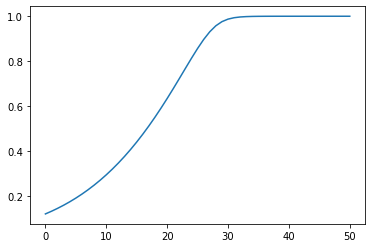

In [23]:
import matplotlib.pyplot as plt ##Die Zeichnung der y_k -Werte des Heating Steps
import os
import pandas as pd

xwerte=np.linspace(0.0,50.0,51)

# select_opt = os.path.join(os.getcwd(),'TSA_y')
# y_k_df = pd.read_csv(os.path.join(select_opt,'y_k'),names=['ywerte'], delim_whitespace=True)
   
plt.plot(xwerte,y_k)

In [62]:
#Berechnung der Temperaturschritte T_k_c #K ##Diesmal von der oberen zur unteren Temperatur
def T_k_f(T_k_c,T_low,T_high):
    return(T_k_c-(T_high-T_low)/50)

T_k_c=[]
T_k_c.append(T_k_f(T_high,T_low,T_high))
for k in range (1,51,1):
    res=T_k_f(T_k_c[k-1],T_low,T_high)
    T_k_c.append(res)
len(T_k_c)

51

In [63]:
#Berechnung von c_0_c_k, c_1_c_k und b_1_c_k, b_0_c_k und n_1_c_k, n_0_c_k #- ##wie beim heating step. Wird wegen der neuen Folge an T_k_c neu berechnet
def c_i_f(c_ref,alpha,T_k_c,T_ref):
    return (c_ref+alpha*(T_k_c/T_ref-1)) 
   
c_0_c_k=[]
c_1_c_k=[]
for k in range (0,51,1):
    res0=c_i_f(c_ref[0],alpha[0],T_k_c[k],T_ref[0])
    res1=c_i_f(c_ref[1],alpha[1],T_k_c[k],T_ref[1])
    c_0_c_k.append(res0)
    c_1_c_k.append(res1)

def b_i_f(b_0,Q_b,T_k_c,R):
    return(b_0*math.exp(Q_b/(T_k_c*R)))

b_0_c_k=[]
b_1_c_k=[]
for k in range(0,51,1):
    res0=b_i_f(b_0[0],Q_b[0],T_k_c[k],R)
    res1=b_i_f(b_0[1],Q_b[1],T_k_c[k],R)
    b_0_c_k.append(res0)
    b_1_c_k.append(res1)
    
#Berechnung von n_0_k und n_1_k    #mol/kg
def n_i_f(n_ref,X,T_ref,T_k_c):
    return(n_ref*math.exp(X*(T_k_c/T_ref-1)))

n_0_c_k=[]
n_1_c_k=[]
for k in range (0,51,1):
    res0=n_i_f(n_ref[0],X[0],T_ref[0],T_k_c[k])
    res1=n_i_f(n_ref[1],X[1],T_ref[1],T_k_c[k])
    n_0_c_k.append(res0)
    n_1_c_k.append(res1)
    
n_0_c_k

[5.658019490078875,
 5.6858020937982765,
 5.713721118587064,
 5.741777234314348,
 5.769971114138509,
 5.798303434523336,
 5.826774875254264,
 5.85538611945468,
 5.884137853602318,
 5.913030767545725,
 5.942065554520817,
 5.971242911167509,
 6.000563537546431,
 6.030028137155723,
 6.059637416947919,
 6.089392087346905,
 6.119292862264961,
 6.149340459119901,
 6.179535598852272,
 6.2098790059426685,
 6.240371408429097,
 6.271013537924459,
 6.3018061296340955,
 6.3327499223734325,
 6.363845658585702,
 6.395094084359766,
 6.426495949448,
 6.458052007284303,
 6.48976301500216,
 6.521629733452811,
 6.553652927223512,
 6.585833364655872,
 6.618171817864292,
 6.650669062754497,
 6.683325879042139,
 6.716143050271514,
 6.74912136383436,
 6.782261610988748,
 6.815564586878072,
 6.849031090550117,
 6.882661924976241,
 6.916457897070633,
 6.9504198177096805,
 6.984548501751422,
 7.018844768055093,
 7.053309439500783,
 7.087943343009171,
 7.122747309561372,
 7.157722174218868,
 7.192868776143552,
 

ValueError: x and y must have same first dimension, but have shapes (52,) and (51,)

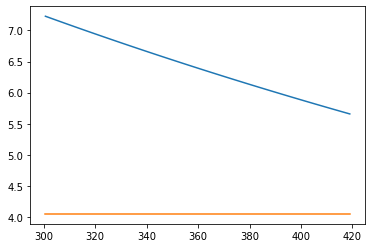

In [64]:
plt.plot(T_k_c, n_0_c_k, label='n_0_c_k')
plt.plot(T_k_c, n_1_c_k, label='n_1_c_k')
plt.plot(T_k, n_0_k,'x', label='n_0_k')
plt.plot(T_k, n_1_k, 'x',label='n_1_k')
plt.legend()

In [ ]:
plt.plot(T_k_c, b_0_c_k, label='b_0_c_k')
plt.plot(T_k_c, b_1_c_k, label='b_1_c_k')
plt.plot(T_k, b_0_k,'x', label='b_0_k')
plt.plot(T_k, b_1_k, 'x',label='b_1_k')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (52,) and (51,)

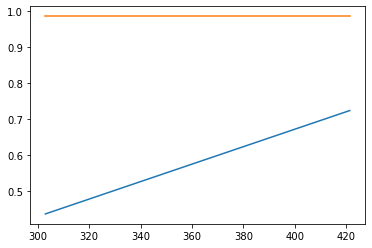

In [39]:
plt.plot(T_k_c, c_0_c_k, label='c_0_c_k')
plt.plot(T_k_c, c_1_c_k, label='c_1_c_k')
plt.plot(T_k, c_0_k,'x', label='c_0_k')
plt.plot(T_k, c_1_k, 'x',label='c_1_k')
plt.legend()

In [40]:
y_F

[0.12, 0.88]

In [41]:
n_0_k[-1]

5.63037264083293

In [42]:

n_0_c_k[0]

5.630372640832929

In [43]:
N_out[-1]

0.05762048911359062

In [44]:
y_k_c

[0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919828562,
 0.9999999919

In [45]:
n_ads_0

[3.5021028570009154,
 3.50025961571049,
 3.4983081621930707,
 3.496239144128725,
 3.4940420013452305,
 3.491704750694885,
 3.4892137235962024,
 3.486553243115546,
 3.4837052230849803,
 3.480648665656805,
 3.4773590250887083,
 3.4738073932561515,
 3.4699594448010433,
 3.465774053212554,
 3.4612014498894386,
 3.456180739451976,
 3.4506364916899095,
 3.4444739866123806,
 3.4375724593108594,
 3.4297753224341956,
 3.4208757517767268,
 3.4105950907884175,
 3.398550180782169,
 3.384204232462829,
 3.3667961601284175,
 3.3452532818737364,
 3.31813537348765,
 3.283769764577047,
 3.2408361253195843,
 3.189294036881098,
 3.1307017261765737,
 3.067381600370407,
 3.001387740322462,
 2.934111458247647,
 2.8663722754564747,
 2.798624687508469,
 2.731119757738177,
 2.6640024190059277,
 2.597363951765778,
 2.5312688134507937,
 2.4657679625955473,
 2.40090534976595,
 2.3367210223926635,
 2.273252571888085,
 2.2105357762498934,
 2.148604855455279,
 2.0874925431578704,
 2.0272300733492865,
 1.9678471300473

In [46]:
N_gas_0[-1]

0.014009919496491408

In [47]:
n_ads_0[-1]

1.8518304239329015

In [48]:
N_total_0

[3.504440500533874,
 3.502808742410659,
 3.5010854291953524,
 3.499262136603297,
 3.497329246232106,
 3.4952757251261266,
 3.493088856779332,
 3.490753910146284,
 3.4882537287559665,
 3.485568215795022,
 3.4826736822353808,
 3.4795420125222463,
 3.476139584376808,
 3.47242585210557,
 3.468351462750685,
 3.463855714420985,
 3.458863071390226,
 3.4532783037292365,
 3.446979584902487,
 3.439808504541895,
 3.4315553496481748,
 3.4219370595216563,
 3.410563884107954,
 3.3968892540766187,
 3.380137677700589,
 3.3592156373875883,
 3.3326543248176717,
 3.2987468175552275,
 3.256143215694988,
 3.204795345356747,
 3.1462824023560443,
 3.082962614290533,
 3.0169225681360574,
 2.949575491418821,
 2.881753491825259,
 2.813917696356647,
 2.7463225034033996,
 2.6791144785989243,
 2.612385686498508,
 2.5462009533005863,
 2.4806114051489323,
 2.4156610634456928,
 2.351390000163381,
 2.287835809261332,
 2.225034260953608,
 2.1630195626891777,
 2.101824433520432,
 2.041480092038603,
 1.982016206666926,
 

In [49]:
N_out[-1]

0.05762048911359062

In [50]:
n_ads_0[-1]

1.8518304239329015

In [51]:
y_k[-1] 

0.9999999919828562

In [52]:
T_k[-1]

500

In [53]:
T_k_c[0]

421.34

In [54]:
print(f'b_0_k[-1] = {b_0_k[-1]}')
print(f'c_0_k[-1] = {c_0_k[-1]}')
print(f'n_0_k[-1] = {n_0_k[-1]}')
print(f'n_ads_0[-1] = {n_ads_0[-1]}')
print(f'N_gas_0[-1] = {N_gas_0[-1]}')
print(f'N_total_0[-1] = {N_total_0[-1]}')

b_0_k[-1] = 0.3734916197525033
c_0_k[-1] = 0.724127198657718
n_0_k[-1] = 5.63037264083293
n_ads_0[-1] = 1.8518304239329015
N_gas_0[-1] = 0.014009919496491408
N_total_0[-1] = 1.8658403434293929


In [55]:
P

1

In [56]:
y_k_c_t = 0.9999999919828562
b_0_c_k = 0.3734916197525026
c_0_c_k = 0.7241271986577181
n_0_c_k = 5.630372640832929
b_1_c_k = 0.011410027946939679
c_1_c_k = 0.98624
n_1_c_k = 4.051
n_ads_0_f(n_0_c_k, b_0_c_k, y_k_c_t, c_0_c_k,P, b_1_c_k , c_1_c_k )

1.8518304239329

In [72]:
y_k_c

[0.9999999919828562,
 0.940423147563352,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.9404231475633521,
 0.94042314756

In [79]:
#Materialbilanzen Cooling Step

y_k_c=[]
# y_k_c.append(0.9)
y_k_c.append(y_k[-1])
N_in=[]
N_in.append(N_out[-1]*8)
# N_in.append(0.00001)
N_total_c_0=[]
# N_total_c_0.append(1.84)
N_total_c_0.append(N_total_0[-1])
N_total_c_1=[]
N_total_c_1.append(N_total_1[-1])
# N_total_c_1.append(4e-10)
n_ads_c_0=[]
n_ads_c_1=[]
N_ads_c_0=[]
N_ads_c_1=[]
N_gas_c_0=[]
N_gas_c_1=[]





#Berechnung von n_ads_0 und n_ads_1               #mol/kg            
def n_ads_0_f(n_0_k,b_0_k,y_k,c_0_k,P,b_1_k,c_1_k):
    return((n_0_k*(b_0_k*P*y_k)**c_0_k)/(1+((b_0_k*P*y_k)**c_0_k)+(b_1_k*P*(1-y_k))**c_1_k))

def n_ads_1_f(n_1_k,b_1_k,y_k,c_1_k,P,b_0_k,c_0_k):
    return((n_1_k*(b_1_k*P*(1-y_k))**c_1_k)/(1+(b_1_k*P*(1-y_k))**c_1_k+(b_0_k*P*y_k)**c_0_k))

#Berechnung von N_ads_0 und N_ads_1               #mol
def N_ads_0_f(m_ads,n_ads_c_0):
    return(m_ads*n_ads_c_0)

def N_ads_1_f(m_ads,n_ads_c_1):
    return(m_ads*n_ads_c_1)

#Berechnung von N_gas_0 und N_gas_1             #mol
def N_gas_0_f(epsilon,y_k_c,P,V,R,T_k_c):
    return(epsilon*V*P*10**5*y_k_c/(R*T_k_c))

def N_gas_1_f(epsilon,y_k_c,P,V,R,T_k_c):
    return(epsilon*V*P*10**5*(1-y_k_c)/(R*T_k_c))

#Berechnung von N_total_0 und N_total_1               #mol
def N_total_0_f(N_ads_0,N_gas_0):
    return(N_ads_0+N_gas_0)

def N_total_1_f(N_ads_1,N_gas_1):
    return(N_ads_1+N_gas_1)


def MB_CS(vars):
    N_in_t,y_k_c_t=vars
    print(f'\n  N_in_t ={N_in_t}')
    print(f'y_k_c_t ={y_k_c_t}')
    if y_k_c_t >1.0: y_k_c_t = 0.999999999999999999
    
    print(f'y_k_c_t new ={y_k_c_t}')

    n_ads_0_k=n_ads_0_f(n_0_c_k[k],b_0_c_k[k],y_k_c_t,c_0_c_k[k],P,b_1_c_k[k],c_1_c_k[k])
    N_ads_0_k=N_ads_0_f(m_ads,n_ads_0_k)
    N_gas_0_k=N_gas_0_f(epsilon,y_k_c_t,P,V,R,T_k_c[k])
    N_total_0_k=N_total_0_f(N_ads_0_k,N_gas_0_k)
    
    n_ads_1_k=n_ads_1_f(n_1_c_k[k],b_1_c_k[k],y_k_c_t,c_1_c_k[k],P,b_0_c_k[k],c_0_c_k[k])            
    N_ads_1_k=N_ads_1_f(m_ads,n_ads_1_k)
    N_gas_1_k=N_gas_1_f(epsilon,y_k_c_t,P,V,R,T_k_c[k])
    N_total_1_k=N_total_1_f(N_ads_1_k,N_gas_1_k) 
    
#     print(f'b_0_c_k = {b_0_c_k[k]}')
#     print(f'c_0_c_k = {c_0_c_k[k]}')
#     print(f'n_0_c_k = {n_0_c_k[k]}')
    print(f'n_ads_0 = {n_ads_0_k}')
    print(f'N_gas_0 = {N_gas_0_k}')
    print(f'N_total_0_k = {N_total_0_k}')
    
#     print('\n should be')
#     print(f'y_k ={y_k[-1]}')

#     print(f'b_0_k[-1] = {b_0_k[-1]}')
#     print(f'c_0_k[-1] = {c_0_k[-1]}')
#     print(f'n_0_k[-1] = {n_0_k[-1]}')
    # print(f'n_ads_0[-1] = {n_ads_0[-1]}')
    # print(f'N_gas_0[-1] = {N_gas_0[-1]}')
    # print(f'N_total_0[-1] = {N_total_0[-1]}')
#     print('\n ')
    
    
#     print(f'b_1_c_k = {b_1_c_k[k]}')
#     print(f'c_1_c_k = {c_1_c_k[k]}')
#     print(f'n_1_c_k = {n_1_c_k[k]}')
    print(f'n_ads_1 = {n_ads_1_k}')
    print(f'N_gas_1 = {N_gas_1_k}')
    print(f'N_total_1_k = {N_total_1_k}')
    
#     print('\n should be')
#     print(f'b_1_k[-1] = {b_1_k[-1]}')
#     print(f'c_1_k[-1] = {c_1_k[-1]}')
#     print(f'n_1_k[-1] = {n_1_k[-1]}')
#     print(f'n_ads_1[-1] = {n_ads_1[-1]}')
#     print(f'N_gas_1[-1] = {N_gas_1[-1]}')
#     print(f'N_total_1[-1] = {N_total_1[-1]}')
#     print('\n ')

    print(f'y_F[0]*N_in_t = {y_F[0]*N_in_t}')
    print(f'N_total_0_k = {N_total_0_k}')
    print(f'N_total_c_0[k] = N_total_k-1 = {N_total_c_0[k]}')
    print(f'y_F[1]*N_in_t = {y_F[1]*N_in_t}')
    print(f'N_total_1_k = {N_total_1_k}')
    print(f'N_total_c_1[k] = N_total_k-1 = {N_total_c_1[k]}')
    
    print(f'k={k}, n_ads_0_k ={n_ads_0_k}')
    
    eqn_1=N_total_c_0[k]+y_F[0]*N_in_t-N_total_0_k 
    eqn_2=N_total_c_1[k]+y_F[1]*N_in_t-N_total_1_k  
    print(f'eqn_1 = {eqn_1}')
    print(f'eqn_2= {eqn_2} \n')
    
    return [eqn_1,eqn_2]


for k in range (0,50,1): 
    print(f'\n \n k={k} \n -----------------------------')
    #N_in_t,y_k_c_t= fsolve(MB_CS, (N_in[k], y_k_c[k]))
    x = scipy.optimize.root(MB_CS, (N_in[k], y_k_c[k]) , method='hybr')
    N_in_t,y_k_c_t=x['x']

    y_k_c.append(y_k_c_t)
    N_in.append(N_in_t)
    
    n_ads_0_c=n_ads_0_f(n_0_c_k[k+1],b_0_c_k[k+1],y_k_c[k+1],c_0_c_k[k+1],P,b_1_c_k[k+1],c_1_c_k[k+1])
    n_ads_c_0.append(n_ads_0_c)
    N_ads_0_c=N_ads_0_f(m_ads,n_ads_0_c)
    N_ads_c_0.append(N_ads_0_c)
    N_gas_0_c=N_gas_0_f(epsilon,y_k_c[k+1],P,V,R,T_k_c[k+1])
    N_total_0_c=N_total_0_f(N_ads_0_c,N_gas_0_c)
    N_total_c_0.append(N_total_0_c)
    
    n_ads_1_c=n_ads_1_f(n_1_c_k[k+1],b_1_c_k[k+1],y_k_c[k+1],c_1_c_k[k+1],P,b_0_c_k[k+1],c_0_c_k[k+1])  
    n_ads_c_1.append(n_ads_1_c)
    N_ads_1_c=N_ads_1_f(m_ads,n_ads_1_c)
    N_ads_c_1.append(N_ads_1_c)
    N_gas_1_c=N_gas_1_f(epsilon,y_k_c[k+1],P,V,R,T_k_c[k+1])
    N_total_1_c=N_total_1_f(N_ads_1_c,N_gas_1_c)   
    N_total_c_1.append(N_total_1_c)
    
    
N_in


 
 k=0 
 -----------------------------

  N_in_t =0.46096391290872496
y_k_c_t =0.9999999919828562
y_k_c_t new =0.9999999919828562
n_ads_0 = 1.9093717909057089
N_gas_0 = 0.014089048762622966
N_total_0_k = 1.923460839668332
n_ads_1 = 3.475116414726257e-10
N_gas_1 = 1.1295393137175595e-10
N_total_1_k = 4.6046557284438164e-10
y_F[0]*N_in_t = 0.05531566954904699
N_total_0_k = 1.923460839668332
N_total_c_0[k] = N_total_k-1 = 1.8658403434293929
y_F[1]*N_in_t = 0.405648243359678
N_total_1_k = 4.6046557284438164e-10
N_total_c_1[k] = N_total_k-1 = 4.541322373272938e-10
k=0, n_ads_0_k =1.9093717909057089
eqn_1 = -0.002304826689891959
eqn_2= 0.40564824335334465 


  N_in_t =0.46096391290872496
y_k_c_t =0.9999999919828562
y_k_c_t new =0.9999999919828562
n_ads_0 = 1.9093717909057089
N_gas_0 = 0.014089048762622966
N_total_0_k = 1.923460839668332
n_ads_1 = 3.475116414726257e-10
N_gas_1 = 1.1295393137175595e-10
N_total_1_k = 4.6046557284438164e-10
y_F[0]*N_in_t = 0.05531566954904699
N_total_0_k = 1.92

[0.46096391290872496,
 0.0033479618912427072,
 -6.720230768311994e-18,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.318005983261871e-19,
 1.31800598326187

In [ ]:
y_

In [ ]:
#Berechnung der central difference approximation zur Enthalpie für den cooling Step, da durch die andere T-Reihe auch andere Werte 
#für b_i_k, c_i_k und n_i_k berechnet werden

# h_p=0.00000001 #bar  ##Es scheint wohl nicht so viel Unterschied zu machen wie genau die Differenzen gewählt werden.  
# h_T=2.3664 #K        ##h_p darf nicht größer als 0.00000001 gewählt werden, weil es sonst Probleme gibt
h_p=0.0000000001 #bar
h_T=0.5 #K
n_0_P_1,n_0_P_0,n_1_P_1,n_1_P_0,n_1_T,n_0_T=[],[],[],[],[],[]

def n_ads_i_f(n_i_k,b_i_k,c_i_k,P_i,P_j,b_j_k,c_j_k):
    return((n_i_k*(b_i_k*P_i)**c_i_k)/(1+((b_i_k*P_i)**c_i_k)+(b_j_k*P_j)**c_j_k))

def n_0_P_0_f(h_p):
    n_ads_0_p=n_ads_i_f(n_0_c_k[k],b_0_c_k[k],c_0_c_k[k],P*y_k_c[k]+h_p,P*(1-y_k_c[k]),b_1_c_k[k],c_1_c_k[k])
    n_ads_0_m=n_ads_i_f(n_0_c_k[k],b_0_c_k[k],c_0_c_k[k],P*y_k_c[k]-h_p,P*(1-y_k_c[k]),b_1_c_k[k],c_1_c_k[k])
    n_0_P_0=(n_ads_0_p-n_ads_0_m)/(2*h_p)
    return n_0_P_0

def n_0_P_1_f(h_p):
    n_ads_0_p=n_ads_i_f(n_0_c_k[k],b_0_c_k[k],c_0_c_k[k],P*y_k_c[k],P*(1-y_k_c[k])+h_p,b_1_c_k[k],c_1_c_k[k])
    n_ads_0_m=n_ads_i_f(n_0_c_k[k],b_0_c_k[k],c_0_c_k[k],P*y_k_c[k],P*(1-y_k_c[k])-h_p,b_1_c_k[k],c_1_c_k[k])
    n_0_P_1=(n_ads_0_p-n_ads_0_m)/(2*h_p)
    return n_0_P_1

def n_1_P_0_f(h_p):
    n_ads_1_p=n_ads_i_f(n_1_c_k[k],b_1_c_k[k],c_1_c_k[k],P*(1-y_k_c[k]),P*y_k_c[k]+h_p,b_0_c_k[k],c_0_c_k[k])
    n_ads_1_m=n_ads_i_f(n_1_c_k[k],b_1_c_k[k],c_1_c_k[k],P*(1-y_k_c[k]),P*y_k_c[k]-h_p,b_0_c_k[k],c_0_c_k[k])
    n_1_P_0=(n_ads_1_p-n_ads_1_m)/(2*h_p)
    return n_1_P_0

def n_1_P_1_f(h_p):
    n_ads_1_p=n_ads_i_f(n_1_c_k[k],b_1_c_k[k],c_1_c_k[k],P*(1-y_k_c[k])+h_p,P*y_k_c[k],b_0_c_k[k],c_0_c_k[k])
    n_ads_1_m=n_ads_i_f(n_1_c_k[k],b_1_c_k[k],c_1_c_k[k],P*(1-y_k_c[k])-h_p,P*y_k_c[k],b_0_c_k[k],c_0_c_k[k])
    n_1_P_1=(n_ads_1_p-n_ads_1_m)/(2*h_p)
    return n_1_P_1

def n_i_T_f(h_T):                                        ##T_k is in c_0_k, c_1_k, b_0_k, b_1_k, n_1_k und n_0_k enthalten. 
    b_0_p=b_i_f(b_0[0],Q_b[0],T_k_c[k]+h_T,R)              ##Deshalb werden die Werte neu berechnet. Jeweils mit +h_T und -h_T
    b_0_m=b_i_f(b_0[0],Q_b[0],T_k_c[k]-h_T,R)
    b_1_p=b_i_f(b_0[1],Q_b[1],T_k_c[k]+h_T,R)
    b_1_m=b_i_f(b_0[1],Q_b[1],T_k_c[k]-h_T,R)
    
    c_0_p=c_i_f(c_ref[0],alpha[0],T_k_c[k]+h_T,T_ref[0])
    c_0_m=c_i_f(c_ref[0],alpha[0],T_k_c[k]-h_T,T_ref[0])
    c_1_p=c_i_f(c_ref[1],alpha[1],T_k_c[k]+h_T,T_ref[1])
    c_1_m=c_i_f(c_ref[1],alpha[1],T_k_c[k]-h_T,T_ref[1])
    
    n_0_p=n_i_f(n_ref[0],X[0],T_ref[0],T_k_c[k]+h_T)
    n_0_m=n_i_f(n_ref[0],X[0],T_ref[0],T_k_c[k]-h_T)
    n_1_p=n_i_f(n_ref[1],X[1],T_ref[1],T_k_c[k]+h_T)
    n_1_m=n_i_f(n_ref[1],X[1],T_ref[1],T_k_c[k]-h_T)
    
    n_ads_0_p=n_ads_0_f(n_0_p,b_0_p,y_k_c[k],c_0_p,P,b_1_p,c_1_p)
    n_ads_0_m=n_ads_0_f(n_0_m,b_0_m,y_k_c[k],c_0_m,P,b_1_m,c_1_m)
    n_ads_1_p=n_ads_1_f(n_1_p,b_1_p,y_k_c[k],c_1_p,P,b_0_p,c_0_p)
    n_ads_1_m=n_ads_1_f(n_1_m,b_1_m,y_k_c[k],c_1_m,P,b_0_m,c_0_m)
    
    n_0_T=(n_ads_0_p-n_ads_0_m)/(2*h_T)
    n_1_T=(n_ads_1_p-n_ads_1_m)/(2*h_T)
    return n_0_T, n_1_T
      
    
for k in range (0,50,1):

    res=n_0_P_1_f(h_p)
    n_0_P_1.append(res)

    res=n_0_P_0_f(h_p)
    n_0_P_0.append(res)

    res=n_1_P_1_f(h_p)
    n_1_P_1.append(res)

    res=n_1_P_0_f(h_p)
    n_1_P_0.append(res)

    res0,res1=n_i_T_f(h_T)
    n_0_T.append(res0)
    n_1_T.append(res1)
  


In [ ]:
#Berechnung der Enthalpie

Delta_H_0,Delta_H_1=[],[]

def Delta_H_0_f(R,T_k,P,y_k,n_0_P_1,n_1_T,n_0_T,n_1_P_1,n_0_P_0,n_1_P_0):
    return(R*T_k**2/(P*y_k)*(n_0_P_1*n_1_T-n_0_T*n_1_P_1)/(n_0_P_0*n_1_P_1-n_0_P_1*n_1_P_0))

def Delta_H_1_f(R,T_k,P,y_k,n_1_P_0,n_0_T,n_1_T,n_0_P_0,n_1_P_1,n_0_P_1):
    return(R*T_k**2/(P*(1-y_k))*(n_1_P_0*n_0_T-n_1_T*n_0_P_0)/(n_1_P_1*n_0_P_0-n_1_P_0*n_0_P_1))

for k in range(0,49,1):
    
    res0=Delta_H_0_f(R,T_k_c[k+1],P,y_k_c[k+1],n_0_P_1[k],n_1_T[k],n_0_T[k],n_1_P_1[k],n_0_P_0[k],n_1_P_1[k])
    res1=Delta_H_1_f(R,T_k_c[k+1],P,y_k_c[k+1],n_1_P_0[k],n_0_T[k],n_1_T[k],n_0_P_0[k],n_1_P_1[k],n_0_P_1[k])
    Delta_H_0.append(res0)
    Delta_H_1.append(res1)
    
Delta_H_0

In [ ]:
#Berechnung der Energiebilanz des Cooling Steps

Delta_N_ads_c_0, Delta_N_ads_c_1, Q_ext_c=[],[],[]

def Q_ext_c_f(m_ads,c_p_ads,Delta_T,Delta_H_0,Delta_H_1,Delta_N_ads_0,Delta_N_ads_1):
    return(-m_ads*c_p_ads*Delta_T+Delta_H_0*Delta_N_ads_0+Delta_H_1*Delta_N_ads_1)

        
for k in range (0,49,1):
  
    res0=Delta_N_ads_0_f(N_ads_0_c[k+1],N_ads_0_c[k]) #Die Funktionen sind schon beim Heating Step definiert und werden hier einfach von oben aufgerufen
    res1=Delta_N_ads_1_f(N_ads_1_c[k+1],N_ads_1_c[k])
    Delta_N_ads_c_0.append(res0)
    Delta_N_ads_c_1.append(res1)

    res=Q_ext_c_f(m_ads,c_p_ads,Delta_T,Delta_H_0[k],Delta_H_1[k],Delta_N_ads_c_0[k],Delta_N_ads_c_1[k])
    Q_ext_c.append(res)
    
Q_ext_c

In [ ]:
#Berechnung der spezifischen Energie des Cooling Steps

Sum_Q_c

for k in range (0,49,1):                           ##Summe der Wärmen für specific energy
    Sum_Q_c=Sum_Q_c+Q_ext_c[k]

def Sp_E_f(Sum_Q,MW,Sum_Z):                    ##Berechnung von specific energy
    return(Sum_Q/(MW/1000*Sum_Z))

Sp_E_c=Sp_E_f(Sum_Q_c,MW[0],Sum_Z_PP)             #J/kg? Einheit von Delta H? Müsste nach Paper 2.37 MJ/kg sein

print('Specific energy: {:6.4f}'.format(Sp_E_c))
print('Paper: Sp_cooling=?')

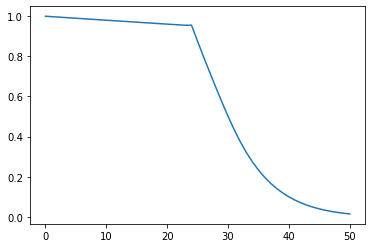

In [92]:
xwerte=np.linspace(0.0,50.0,51) ###Da der cooling Step immer noch nicht läuft, sind das irgendwelche falschen Zwischenergebnisse gewesen

select_opt = os.path.join(os.getcwd(),'TSA_y')
y_k_df = pd.read_csv(os.path.join(select_opt,'y_k_c'),names=['ywerte'], delim_whitespace=True)
   
plt.plot(xwerte,y_k_c)

In [962]:
#Adsorptionsschritt Materialbilanzen

N_feed_a=[]
N_waste=[]

def MB_AS(vars):
    N_feed_a,N_waste=vars
    return(N_total_c_0[50]+y_F[0]*N_feed_a-N_total_0[0]-y_k_c[50]*N_waste,
           N_total_c_1[50]+y_F[1]*N_feed_a-N_total_1[0]-(1-y_k_c[50])*N_waste)

x = scipy.optimize.root(MB_AS, (N_feed, N_feed) , method='hybr')
N_feed_a,N_waste=x['x']

N_feed_a

[421.34,
 418.9736,
 416.6072,
 414.2408,
 411.8744,
 409.508,
 407.1416,
 404.7752,
 402.4088,
 400.0424,
 397.676,
 395.3096,
 392.9432,
 390.5768,
 388.2104,
 385.844,
 383.4776,
 381.1112,
 378.7448,
 376.3784,
 374.012,
 371.6456,
 369.2792,
 366.9128,
 364.5464,
 362.18,
 359.8136,
 357.4472,
 355.0808,
 352.7144,
 350.348,
 347.9816,
 345.6152,
 343.2488,
 340.8824,
 338.516,
 336.1496,
 333.7832,
 331.4168,
 329.0504,
 326.684,
 324.3176,
 321.95120000000003,
 319.58480000000003,
 317.21840000000003,
 314.85200000000003,
 312.48560000000003,
 310.11920000000003,
 307.75280000000004,
 305.38640000000004,
 303.02000000000004]

In [ ]:
#Berechnung der Wiedergewinnung

def Recovery(Sum_Z,y_F,N_feed):
    return(Sum_Z/(y_F*N_feed))

recovery=Recovery(Sum_Z_PP,y_F[0],N_feed_a)

print('Recovery: {:6.4f}'.format(recovery))
print('Paper: Recovery=0.91')